In [1]:
#Importing Important Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df=pd.read_csv("New_data_sample.csv")

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,6,5,4,4,81.5,9.1,55.2,2.7,5.8,54,5.8,0.0,4.61
1,4,4,3,1,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,0.00
2,3,4,8,1,91.5,145.4,608.2,10.7,17.1,43,5.4,0.0,0.00
3,6,5,4,4,81.5,9.1,55.2,2.7,5.8,54,5.8,0.0,10.93
4,3,3,9,6,92.2,102.3,751.5,8.4,24.2,27,3.1,0.0,6.58


In [5]:
#Assigning Dependent and independent variables
X=df.drop('area',axis=1)
Y=df['area']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2 , random_state=0)

In [7]:
#Selection of best model using various Regressor Metrices
num_instances = len(X)
models = []
models.append(('Gradient Boost', GradientBoostingRegressor(random_state=0)))
models.append(('Decision Tree', DecisionTreeRegressor(random_state=0)))
models.append(('Extra Trees', ExtraTreesRegressor(random_state=0)))
models.append(('Random Forest',RandomForestRegressor(random_state=0)))
models.append(('KNN Regressor', KNeighborsRegressor()))
table=[['Model Name','Score','Ex_Var_Score', 'MAE', 'MSE', 'R2_Score(in %)']]
name2=[];score2=[];ex_var_score2=[];mae2=[]; mse2=[];r_score2=[];
# Evaluations
for name, model in models:
    name2.append(name);
    # Fitting the model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # Evaluating the model
    score=round(model.score(x_test, y_test),4)
    score2.append(score)
    ex_var_score = round(explained_variance_score(y_test, y_pred),4)
    ex_var_score2.append(ex_var_score)
    mae = round(mean_absolute_error(y_test, y_pred),2)
    mae2.append(mae)
    mse = round(mean_squared_error(y_test, y_pred),2)
    mse2.append(mse)
    r_score=round(r2_score(y_test, y_pred),4)
    r_score2.append(r_score)
    table.append([name,score,ex_var_score, mae, mse, r_score*100])    

In [8]:
from tabulate import tabulate

print(tabulate(table,headers='firstrow',tablefmt='grid'))

+----------------+---------+----------------+-------+---------+------------------+
| Model Name     |   Score |   Ex_Var_Score |   MAE |     MSE |   R2_Score(in %) |
+================+=========+================+=======+=========+==================+
| Gradient Boost |  0.9173 |         0.9173 |  9.78 |  280.53 |            91.73 |
+----------------+---------+----------------+-------+---------+------------------+
| Decision Tree  |  0.991  |         0.991  |  1.31 |   30.38 |            99.1  |
+----------------+---------+----------------+-------+---------+------------------+
| Extra Trees    |  0.9329 |         0.9339 |  2.96 |  227.67 |            93.29 |
+----------------+---------+----------------+-------+---------+------------------+
| Random Forest  |  0.8744 |         0.8779 |  6.84 |  425.89 |            87.44 |
+----------------+---------+----------------+-------+---------+------------------+
| KNN Regressor  |  0.554  |         0.5541 | 12.97 | 1512.49 |            55.4  |
+---

In [9]:
""" Metrices Description and Selection Criterion:
1) Score:
- Higher the Test Score, Better is the model

2) The explained variance score: 
- It explains the dispersion of errors of a given dataset
- Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

3) MAE:
- Absolute Error = |Actual observation – predicted observation|
- This involves adding all the absolute errors and dividing with the total number of observations.
- The lower the value of MAE, the result is better.

4) MSE:
- It is the average of the square of the errors. 
- The larger the number the larger the error.

5) R2_Score:
- the proportion of the variance in the dependent variable that is predictable from the independent variable.
- if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all.
"""

' Metrices Description and Selection Criterion:\n1) Score:\n- Higher the Test Score, Better is the model\n\n2) The explained variance score: \n- It explains the dispersion of errors of a given dataset\n- Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.\n\n3) MAE:\n- Absolute Error = |Actual observation – predicted observation|\n- This involves adding all the absolute errors and dividing with the total number of observations.\n- The lower the value of MAE, the result is better.\n\n4) MSE:\n- It is the average of the square of the errors. \n- The larger the number the larger the error.\n\n5) R2_Score:\n- the proportion of the variance in the dependent variable that is predictable from the independent variable.\n- if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all.\n'

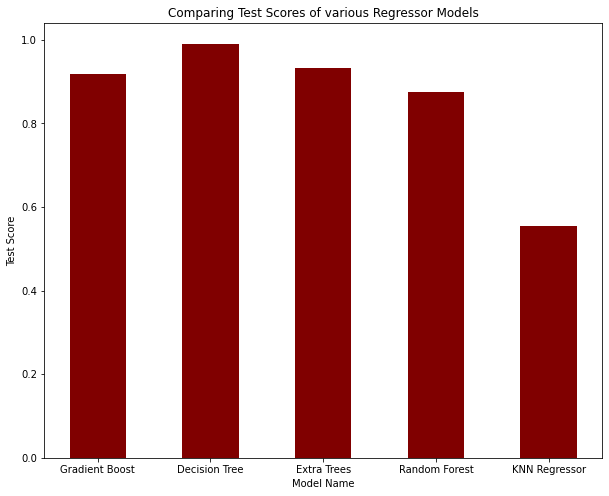

In [10]:
fig = plt.figure(figsize = (10, 8))
# creating the bar plot
plt.bar(name2,score2, color ='maroon',
        width = 0.5)
plt.xlabel("Model Name")
plt.ylabel("Test Score")
plt.title("Comparing Test Scores of various Regressor Models")
plt.show()

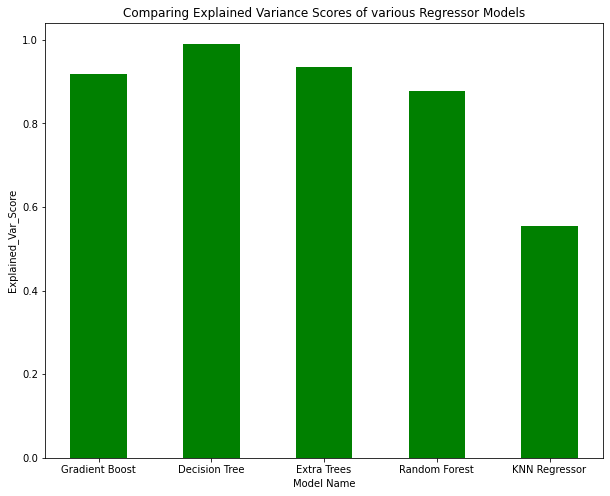

In [11]:
fig = plt.figure(figsize = (10, 8))
# creating the bar plot
plt.bar(name2,ex_var_score2, color ='green',
        width = 0.5)
plt.xlabel("Model Name")
plt.ylabel("Explained_Var_Score")
plt.title("Comparing Explained Variance Scores of various Regressor Models")
plt.show()

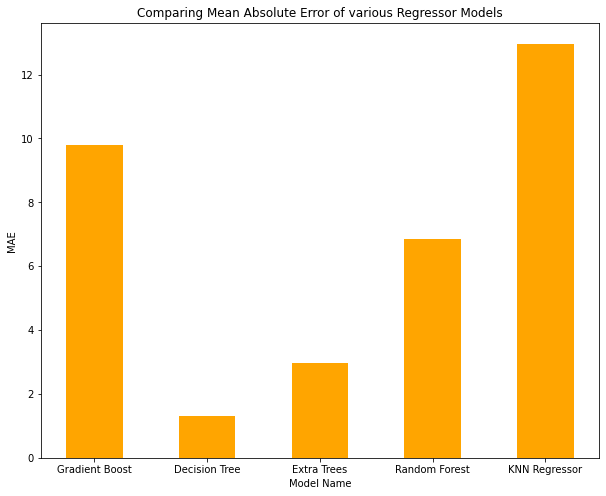

In [12]:
fig = plt.figure(figsize = (10, 8))
# creating the bar plot
plt.bar(name2,mae2, color ='orange',
        width = 0.5)
plt.xlabel("Model Name")
plt.ylabel("MAE")
plt.title("Comparing Mean Absolute Error of various Regressor Models")
plt.show()

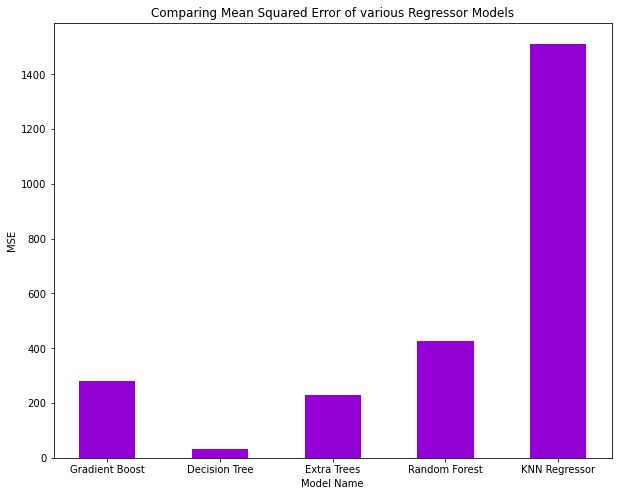

In [13]:
fig = plt.figure(figsize = (10, 8))
# creating the bar plot
plt.bar(name2,mse2, color ='darkviolet',
        width = 0.5)
plt.xlabel("Model Name")
plt.ylabel("MSE")
plt.title("Comparing Mean Squared Error of various Regressor Models")
plt.show()

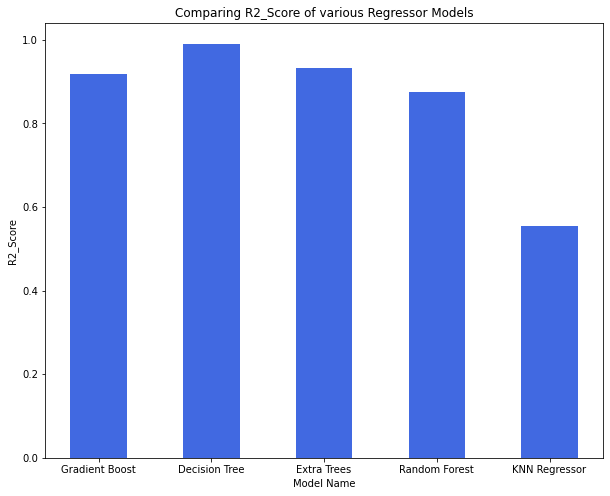

In [14]:
fig = plt.figure(figsize = (10, 8))
# creating the bar plot
plt.bar(name2,r_score2, color ='royalblue',
        width = 0.5)
plt.xlabel("Model Name")
plt.ylabel("R2_Score")
plt.title("Comparing R2_Score of various Regressor Models")
plt.show()

In [15]:
#From Using the criterion above, it is obivious that the Decision Trees Regressor is the Best Model because:
#It has the Highest Score in terms of test Score, explained variance score and R2_score
#It has Lowest Mean Absolute Error and Mean Squared Error
#Thus, Decision Trees Regressor is the Best Model

In [16]:
#Fitting model using Decision Trees Regressor
DTR = DecisionTreeRegressor(random_state=0)
DTR.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [17]:
test_score_DTR=DTR.score(x_test,y_test)
train_score_DTR=DTR.score(x_train,y_train)

print("Using Decision Tree Regressor: ")
print("Test Accuracy: {:.4f}".format(test_score_DTR))
print("Train Accuracy: {:.4f}".format(train_score_DTR))


Using Decision Tree Regressor: 
Test Accuracy: 0.9910
Train Accuracy: 1.0000


In [18]:
#Input Parameters
X.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
dtype: object

In [19]:
# Categorising Forest Fire Damage Function
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "Low Damage"
    elif area <= 25:
        return "Moderate "
    elif area <= 100:
        return "High"
    else:
        return "Very High"

In [20]:
#Prediction Function
def showPrediction(test_data):
    pred=DTR.predict([test_data])
    print("Area Burned: {} ha".format(pred) )
    print("Predicted: ",area_cat(pred))

In [21]:
#Predicted values for the test_values
pred=DTR.predict(x_test)
for i in pred:
    print("{:.2f} {}".format(i,area_cat(i)))

0.00 No damage
26.00 High
6.54 Moderate 
6.30 Moderate 
0.00 No damage
36.85 High
0.00 No damage
1.61 Moderate 
1.43 Moderate 
12.64 Moderate 
2.47 Moderate 
0.00 No damage
0.00 No damage
42.87 High
0.00 No damage
0.00 No damage
6.44 Moderate 
0.00 No damage
0.00 No damage
0.00 No damage
746.28 Very High
37.71 High
0.00 No damage
3.07 Moderate 
6.43 Moderate 
0.90 Low Damage
1.36 Moderate 
0.00 No damage
37.71 High
0.00 No damage
8.85 Moderate 
54.29 High
3.07 Moderate 
0.00 No damage
0.00 No damage
0.00 No damage
0.00 No damage
0.00 No damage
0.00 No damage
95.18 High
0.00 No damage
0.00 No damage
6.43 Moderate 
0.00 No damage
86.45 High
0.00 No damage
0.00 No damage
0.00 No damage
3.64 Moderate 
0.00 No damage
1.09 Moderate 
1.75 Moderate 
8.98 Moderate 
0.00 No damage
8.31 Moderate 
0.00 No damage
0.84 Low Damage
0.00 No damage
1.19 Moderate 
0.00 No damage
6.36 Moderate 
2.47 Moderate 
10.08 Moderate 
95.18 High
0.00 No damage
0.00 No damage
0.00 No damage
2.00 Moderate 
0.00 No da

In [172]:
#Using prediction function on sample values considering data is obtained from Sensors:
sample_data1 = [8,5,8,3,93.1,157.3,666.7,13.5,24,36,3.1,0]
showPrediction(sample_data1)

sample_data2 = [4,5,3,5,91.7,33.3,77.5,9,17.2,26,4.5,0]
showPrediction(sample_data2)

Area Burned: [0.24] ha
Predicted:  Low Damage
Area Burned: [0.] ha
Predicted:  No damage
